In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


***Setting up training, validation and test directories***

In [0]:
import os
train_cats_dir = '/content/drive/My Drive/Dataset/cats_and_dogs_small/train/cats'
train_dogs_dir = '/content/drive/My Drive/Dataset/cats_and_dogs_small/train/dogs'
validation_cats_dir = '/content/drive/My Drive/Dataset/cats_and_dogs_small/validation/cats'
validation_dogs_dir = '/content/drive/My Drive/Dataset/cats_and_dogs_small/validation/dogs'
test_cats_dir = '/content/drive/My Drive/Dataset/cats_and_dogs_small/test/cats'
test_dogs_dir = '/content/drive/My Drive/Dataset/cats_and_dogs_small/test/dogs'
train_dir = '/content/drive/My Drive/Dataset/cats_and_dogs_small/train'
validation_dir = '/content/drive/My Drive/Dataset/cats_and_dogs_small/validation'
test_dir = '/content/drive/My Drive/Dataset/cats_and_dogs_small/test'

***Sanity check to count how many images are there in each training split***

In [3]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


***Instantiating a small convnet for dogs vs. cats classification***

In [4]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv

***Configuring the model for training***

In [0]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
                optimizer=optimizers.RMSprop(lr=1e-4),
                metrics=['acc'])

***Data Preprocessing:*** Data should be formatted into appropriately preprocessed floating-point tensors before being fed into the network. Currently, the data sits on a drive as JPEG files, so the steps for getting it into the network are roughly as follows:

1. Read the picture files.
2. Decode the JPEG content to RGB grids of pixels.
3. Convert these into floating-point tensors.
4. Rescale the pixel values (between 0 and 255) to the [0, 1] interval (as you know, neural networks prefer to deal with small input values).


In [6]:
from keras.preprocessing.image import ImageDataGenerator

# Rescales all images by 1/255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                        train_dir,                    # Target directory
                        target_size=(150, 150),        # Resizes all images to 150x150
                        batch_size=20,
                        class_mode='binary')          # Because you use binary_crossentropy loss, you need binary labels

validation_generator = test_datagen.flow_from_directory(
                        validation_dir,
                        target_size=(150, 150),
                        batch_size=20,
                        class_mode='binary')

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


***Fitting the model using a batch generator***

In [7]:
history = model.fit_generator(
                    train_generator,
                    steps_per_epoch=100,
                    epochs=30,
                    validation_data=validation_generator,
                    validation_steps=50)

model.save('cats_and_dogs_small_1.h5')

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
100/100 [==============================] - 799s 8s/step - loss: 0.6877 - acc: 0.5505 - val_loss: 0.6719 - val_acc: 0.5830
Epoch 2/30
100/100 [==============================] - 15s 150ms/step - loss: 0.6584 - acc: 0.6160 - val_loss: 0.6496 - val_acc: 0.6170
Epoch 3/30
100/100 [==============================] - 15s 154ms/step - loss: 0.6199 - acc: 0.6645 - val_loss: 0.6343 - val_acc: 0.6380
Epoch 4/30
100/100 [==============================] - 15s 153ms/step - loss: 0.5728 - acc: 0.6960 - val_loss: 0.6022 - val_acc: 0.6720
Epoch 5/30
100/100 [==============================] - 16s 157ms/step - loss: 0.5389 - acc: 0.7260 - val_loss: 0.5746 - val_acc: 0.6850
Epoch 6/30
100/100 [==============================] - 16s 156ms/step - loss: 0.5117 - acc: 0.7540 - val_loss: 0.6599 - val_acc: 0.6340
Epoch 7/30
100/100 [==============================] - 15s 155ms/step - loss: 0.4799 - acc: 0.7660 - val_loss: 0.5830 - val_acc: 0.6880
Epoch 8/3

***Displaying curves of loss and accuracy during training***

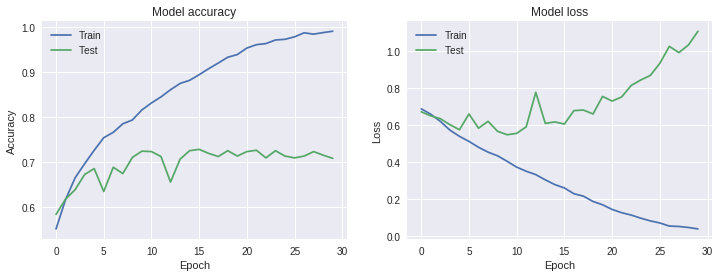

In [8]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid(True)
#plt.show()
# Plot training & validation loss values
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid(True)
plt.show()

***Setting up a data augmentation configuration via ImageDataGenerator***
1. *rotation_range* is a value in degrees (0–180), a range within which to randomly rotate pictures.
2. *width_shift* and *height_shift* are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
3. *shear_range* is for randomly applying shearing transformations.
4. *zoom_range* is for randomly zooming inside pictures.
5. *horizontal_flip* is for randomly flipping half the images horizontally— elevant when there are no assumptions of horizontal asymmetry (for example,
real-world pictures).
6. *fill_mode* is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.

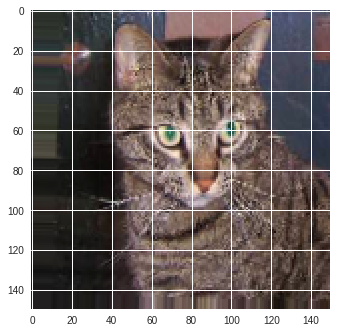

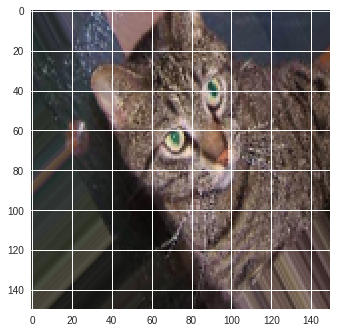

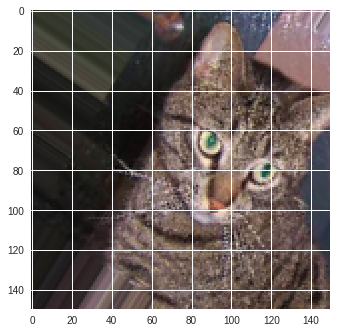

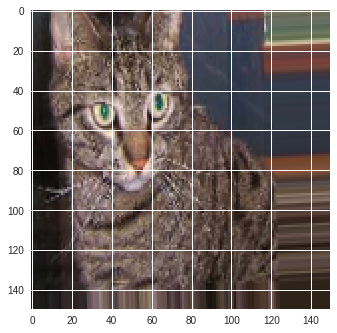

In [9]:
datagen = ImageDataGenerator(
                    rotation_range=40,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    fill_mode='nearest')

from keras.preprocessing import image # Module with image-preprocessing utilities

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[3] # Chooses one image to augment

img = image.load_img(img_path, target_size=(150, 150)) # Reads the image and resizes it

x = image.img_to_array(img) # Converts it to a Numpy array with shape (150, 150, 3)

x = x.reshape((1,) + x.shape) # Reshapes it to (1, 150, 150, 3)

'''Generates batches of randomly transformed images. Loops indefinitely,
so you need to break the loop at some point!'''
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
        
plt.show()

***Defining a new convnet that includes dropout***

In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
                optimizer=optimizers.RMSprop(lr=1e-4),
                metrics=['acc'])

model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
___________________________

***Training the new convnet using data-augmentation generators***

In [11]:
train_datagen = ImageDataGenerator(
                        rescale=1./255,
                        rotation_range=40,
                        width_shift_range=0.2,
                        height_shift_range=0.2,
                        shear_range=0.2,
                        zoom_range=0.2,
                        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255) # Note that the validation data shouldn’t be augmented!

train_generator = train_datagen.flow_from_directory(
                        train_dir,
                        target_size=(150, 150),
                        batch_size=32,
                        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
                        validation_dir,
                        target_size=(150, 150),
                        batch_size=32,
                        class_mode='binary')

history = model.fit_generator(
                        train_generator,
                        steps_per_epoch=100,
                        epochs=100,
                        validation_data=validation_generator,
                        validation_steps=50)

model.save('cats_and_dogs_small_2.h5')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 44s 436ms/step - loss: 0.6906 - acc: 0.5256 - val_loss: 0.6723 - val_acc: 0.5869
Epoch 2/100
100/100 [==============================] - 40s 395ms/step - loss: 0.6786 - acc: 0.5669 - val_loss: 0.6584 - val_acc: 0.5941
Epoch 3/100
100/100 [==============================] - 39s 394ms/step - loss: 0.6612 - acc: 0.6081 - val_loss: 0.6522 - val_acc: 0.5964
Epoch 4/100
100/100 [==============================] - 39s 391ms/step - loss: 0.6546 - acc: 0.6072 - val_loss: 0.6292 - val_acc: 0.6353
Epoch 5/100
100/100 [==============================] - 39s 391ms/step - loss: 0.6400 - acc: 0.6266 - val_loss: 0.6350 - val_acc: 0.6383
Epoch 6/100
100/100 [==============================] - 39s 391ms/step - loss: 0.6304 - acc: 0.6400 - val_loss: 0.5898 - val_acc: 0.6830
Epoch 7/100
100/100 [==============================] - 39s 388ms/step - loss: 0.6142 - acc: 0.6641 -

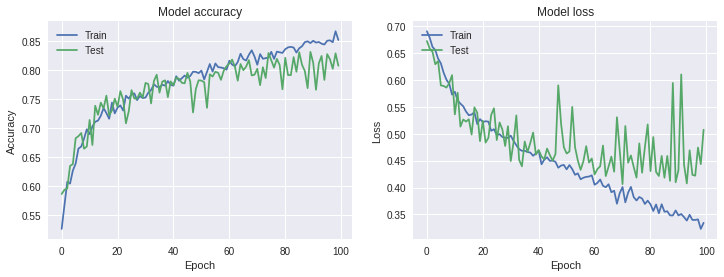

In [12]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid(True)
#plt.show()
# Plot training & validation loss values
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid(True)
plt.show()

***Using a pretrained convnet Instantiating the VGG16 convolutional base***

In [13]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
                    include_top=False,
                    input_shape=(150, 150, 3))
conv_base.summary()

58892288/58889256 [==============================] - 3s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool

***Extracting features using the pretrained convolutional base***

In [16]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

train_dir = '/content/drive/My Drive/Dataset/cats_and_dogs_small/train'
validation_dir = '/content/drive/My Drive/Dataset/cats_and_dogs_small/validation'
test_dir = '/content/drive/My Drive/Dataset/cats_and_dogs_small/test'

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
                                directory,
                                target_size=(150, 150),
                                batch_size=batch_size,
                                class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


*The extracted features are currently of shape (samples, 4, 4, 512). You’ll feed them to a densely connected classifier, so first you must flatten them to (samples, 8192)*

In [0]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

***Defining and training the densely connected classifier***

In [18]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
                loss='binary_crossentropy',
                metrics=['acc'])

history = model.fit(train_features, train_labels,
                        epochs=30,
                        batch_size=20,
                        validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 566us/step - loss: 0.5925 - acc: 0.6755 - val_loss: 0.4385 - val_acc: 0.8390
Epoch 2/30
2000/2000 [==============================] - 1s 379us/step - loss: 0.4106 - acc: 0.8225 - val_loss: 0.3622 - val_acc: 0.8590
Epoch 3/30
2000/2000 [==============================] - 1s 375us/step - loss: 0.3566 - acc: 0.8485 - val_loss: 0.3228 - val_acc: 0.8810
Epoch 4/30
2000/2000 [==============================] - 1s 397us/step - loss: 0.3126 - acc: 0.8680 - val_loss: 0.3145 - val_acc: 0.8650
Epoch 5/30
2000/2000 [==============================] - 1s 401us/step - loss: 0.2811 - acc: 0.8800 - val_loss: 0.2977 - val_acc: 0.8890
Epoch 6/30
2000/2000 [==============================] - 1s 394us/step - loss: 0.2612 - acc: 0.8940 - val_loss: 0.2737 - val_acc: 0.8940
Epoch 7/30
2000/2000 [==============================] - 1s 393us/step - loss: 0.2532 - acc: 0.9000 - val_loss: 0.2692 - val_acc: 0.8930


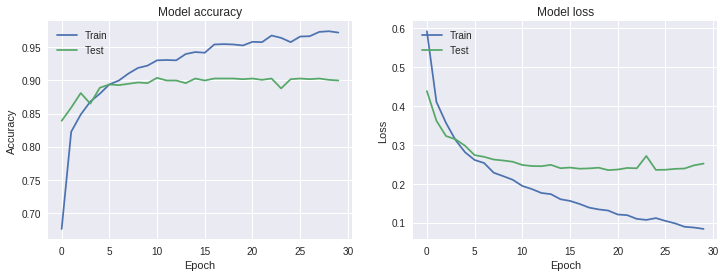

In [19]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid(True)
#plt.show()
# Plot training & validation loss values
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid(True)
plt.show()

***FEATURE EXTRACTION WITH DATA AUGMENTATION***

In [20]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [21]:
print('This is the number of trainable weights before freezing the conv base:', len(model.trainable_weights))
conv_base.trainable = False
print('This is the number of trainable weights after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30
This is the number of trainable weights after freezing the conv base: 4


***Training the model end to end with a frozen convolutional base***

In [22]:
train_datagen = ImageDataGenerator(
                            rescale=1./255,
                            rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                            train_dir,
                            target_size=(150, 150),
                            batch_size=20,
                            class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
                            validation_dir,
                            target_size=(150, 150),
                            batch_size=20,
                            class_mode='binary')

model.compile(loss='binary_crossentropy',
                            optimizer=optimizers.RMSprop(lr=2e-5),
                            metrics=['acc'])

history = model.fit_generator(
                            train_generator,
                            steps_per_epoch=100,
                            epochs=30,
                            validation_data=validation_generator,
                            validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 32s 319ms/step - loss: 0.5758 - acc: 0.7095 - val_loss: 0.4410 - val_acc: 0.8220
Epoch 2/30
100/100 [==============================] - 29s 289ms/step - loss: 0.4835 - acc: 0.7785 - val_loss: 0.3696 - val_acc: 0.8590
Epoch 3/30
100/100 [==============================] - 29s 289ms/step - loss: 0.4400 - acc: 0.8085 - val_loss: 0.3357 - val_acc: 0.8710
Epoch 4/30
100/100 [==============================] - 29s 289ms/step - loss: 0.3913 - acc: 0.8360 - val_loss: 0.3068 - val_acc: 0.8730
Epoch 5/30
100/100 [==============================] - 29s 289ms/step - loss: 0.3774 - acc: 0.8315 - val_loss: 0.2964 - val_acc: 0.8720
Epoch 6/30
100/100 [==============================] - 29s 290ms/step - loss: 0.3775 - acc: 0.8355 - val_loss: 0.2818 - val_acc: 0.8820
Epoch 7/30
100/100 [==============================] - 29s 292ms/step - loss: 0.3501 - acc: 0.8450 - val_lo

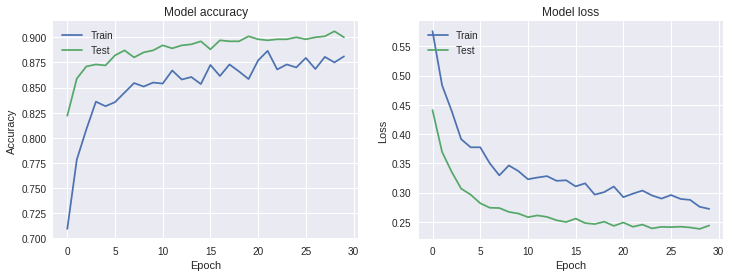

In [23]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid(True)
#plt.show()
# Plot training & validation loss values
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid(True)
plt.show()

***Fine-tuning***
*The steps for fine-tuning a network are as follow:*
1. Add your custom network on top of an already-trained base network.
2. Freeze the base network.
3. Train the part you added.
4. Unfreeze some layers in the base network.
5. Jointly train both these layers and the part you added.

In [24]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

***Freezing all layers up to a specific one***

In [25]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
model.compile(loss='binary_crossentropy',
                optimizer=optimizers.RMSprop(lr=1e-5),
                metrics=['acc'])

history = model.fit_generator(
                train_generator,
                steps_per_epoch=100,
                epochs=100,
                validation_data=validation_generator,
                validation_steps=50)

Epoch 1/100
100/100 [==============================] - 33s 335ms/step - loss: 0.2889 - acc: 0.8715 - val_loss: 0.2215 - val_acc: 0.9010
Epoch 2/100
100/100 [==============================] - 30s 302ms/step - loss: 0.2711 - acc: 0.8895 - val_loss: 0.2651 - val_acc: 0.8900
Epoch 3/100
100/100 [==============================] - 30s 301ms/step - loss: 0.2423 - acc: 0.8960 - val_loss: 0.2327 - val_acc: 0.8970
Epoch 4/100
100/100 [==============================] - 30s 300ms/step - loss: 0.2077 - acc: 0.9100 - val_loss: 0.2074 - val_acc: 0.9210
Epoch 5/100
100/100 [==============================] - 30s 298ms/step - loss: 0.1949 - acc: 0.9225 - val_loss: 0.2375 - val_acc: 0.9130
Epoch 6/100
100/100 [==============================] - 30s 299ms/step - loss: 0.2014 - acc: 0.9115 - val_loss: 0.2203 - val_acc: 0.9180
Epoch 7/100
100/100 [==============================] - 30s 299ms/step - loss: 0.1816 - acc: 0.9245 - val_loss: 0.1780 - val_acc: 0.9320
Epoch 8/100
100/100 [===========================

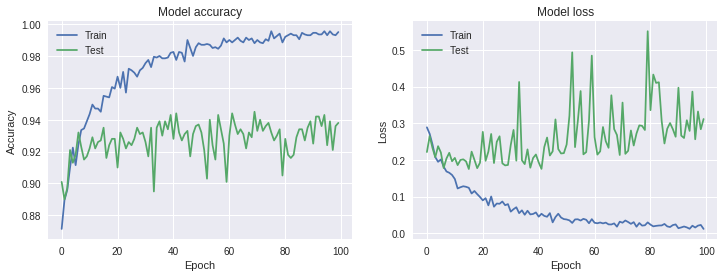

In [26]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid(True)
#plt.show()
# Plot training & validation loss values
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid(True)
plt.show()

In [27]:
test_generator = test_datagen.flow_from_directory(
                test_dir,
                target_size=(150, 150),
                batch_size=20,
                class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)

print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
test acc: 0.9329999911785126


***Visualizing intermediate activations***

In [28]:
from keras.models import load_model
model = load_model('cats_and_dogs_small_2.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

***Preprocessing a single image***

(1, 150, 150, 3)
(1, 150, 150, 3)


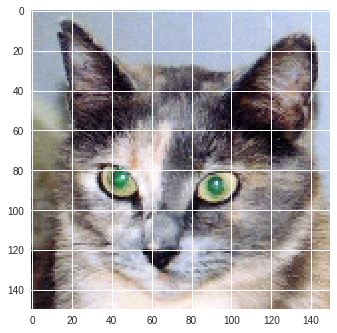

In [29]:
img_path = '/content/drive/My Drive/Dataset/cats_and_dogs_small/cat.1700.jpg'

from keras.preprocessing import image

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

print(img_tensor.shape)
print(img_tensor.shape)

plt.imshow(img_tensor[0])
plt.show()

***Instantiating a model from an input tensor and a list of output tensors***

In [0]:
from keras import models

layer_outputs = [layer.output for layer in model.layers[:8]] # Extracts the outputs of the top eight layers
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

***Running the model in predict mode***

In [0]:
activations = activation_model.predict(img_tensor)

***Visualizing the fifth channel***

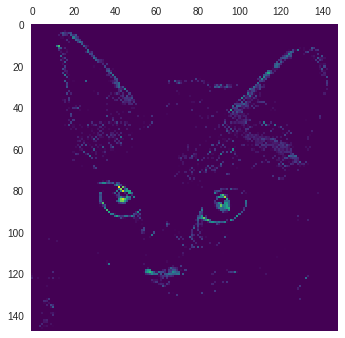

In [47]:
first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')
plt.grid(False)

***Visualizing the fifteenth channel***

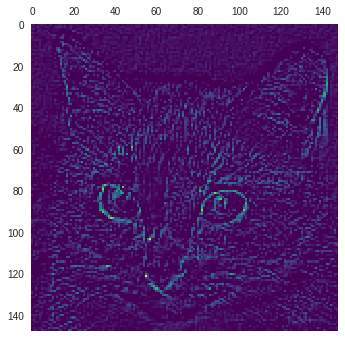

In [57]:
plt.matshow(first_layer_activation[0, :, :, 14], cmap='viridis')
plt.grid(False)

***Visualizing every channel in every intermediate activation***

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


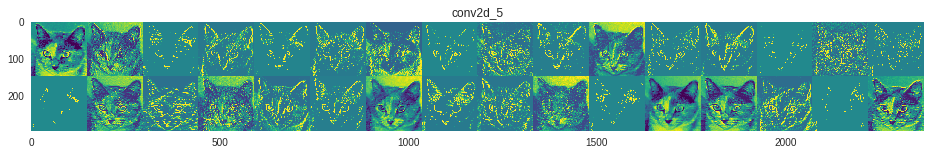

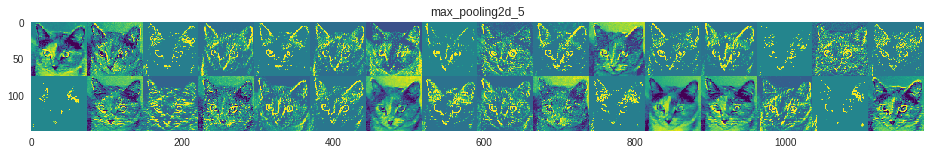

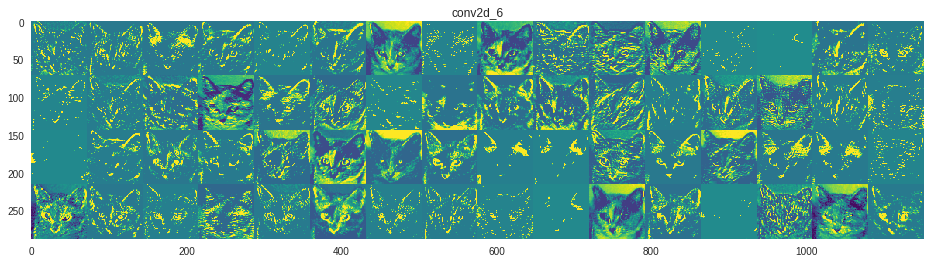

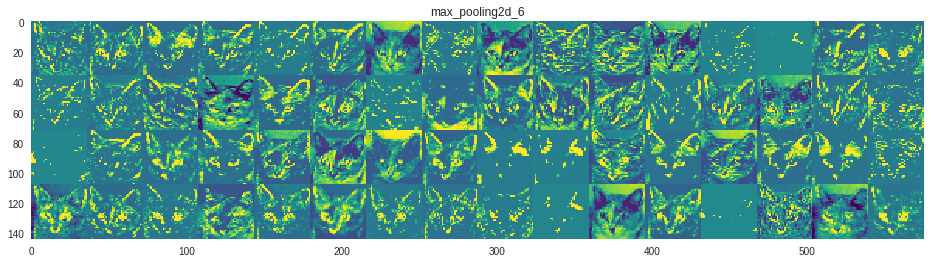

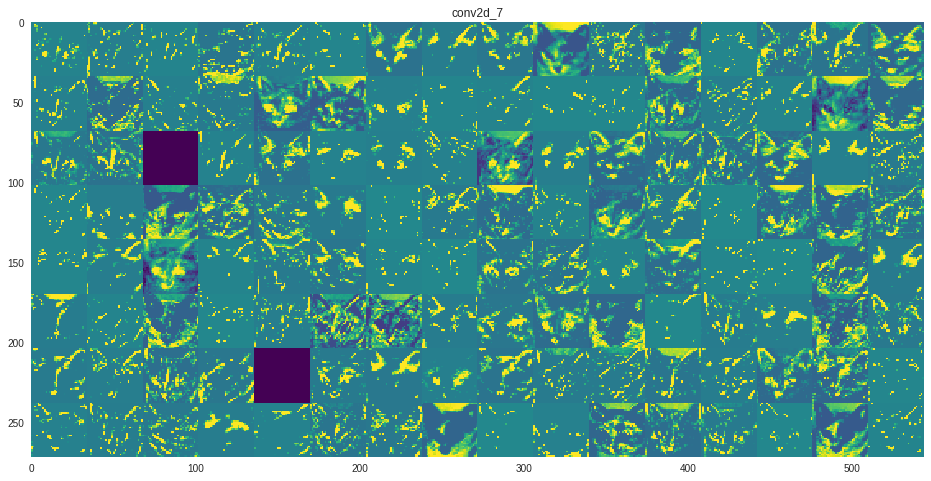

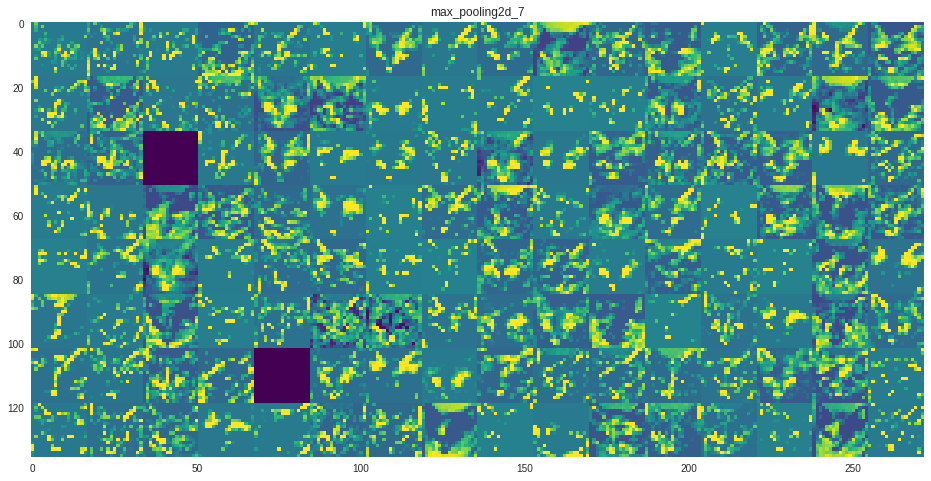

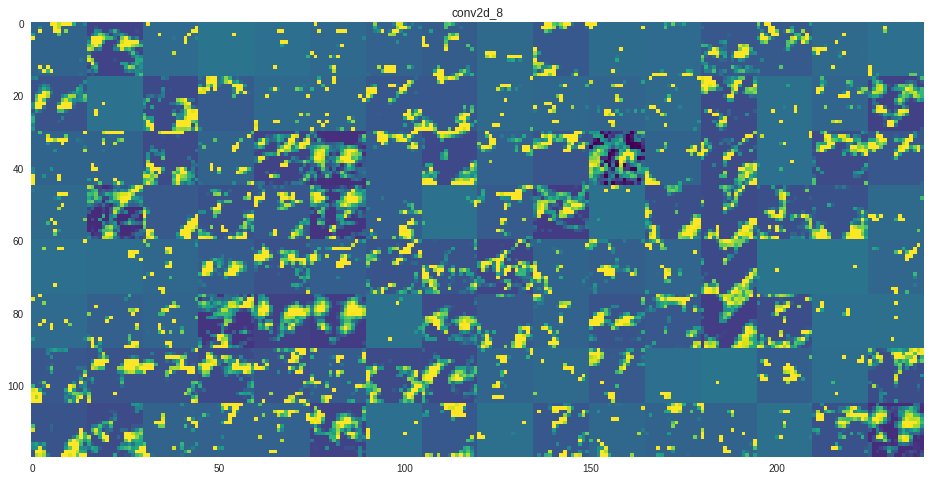

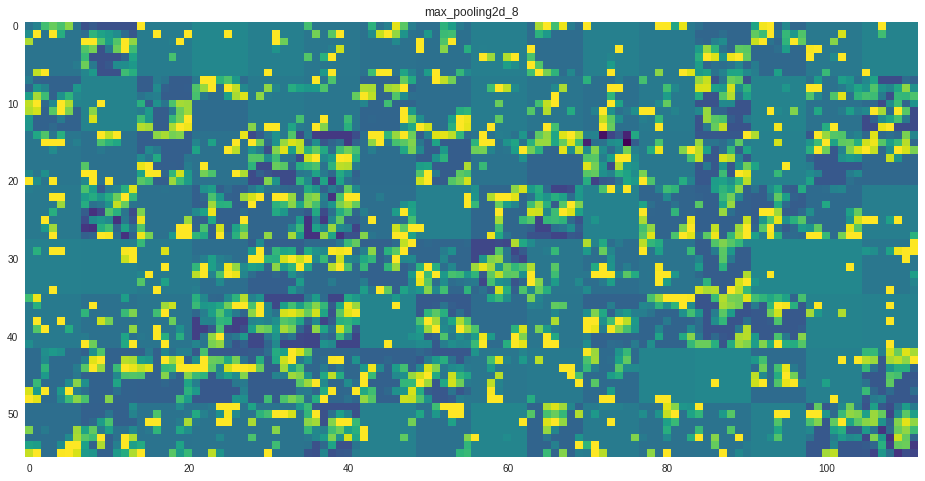

In [34]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    
    size = layer_activation.shape[1] # The feature map has shape (1, size, size, n_features).
    
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            channel_image -= channel_image.mean()  #  Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image # Displays the grid
            
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

***Visualizing convnet filters***

In [0]:
from keras.applications import VGG16
from keras import backend as K

# Defining the loss tensor for filter visualization

model = VGG16(weights='imagenet',
                include_top=False)

layer_name = 'block3_conv1'
filter_index = 0

layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

# Obtaining the gradient of the loss with regard to the input

grads = K.gradients(loss, model.input)[0] # The call to gradients returns a list of tensors (of size 1 in this case). Hence, you keep only the first element—which is a tensor.

# Gradient-normalization trick

grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5) # Add 1e–5 before dividing to avoid accidentally dividing by 0.

# Fetching Numpy output values given Numpy input values

iterate = K.function([model.input], [loss, grads])
loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])
          
# Loss maximization via stochastic gradient descent

input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128. # Starts from a gray image with some noise

step = 1. # Magnitude of each gradient update
for i in range(40): # Runs gradient ascent for 40 steps
    loss_value, grads_value = iterate([input_img_data]) # Computes the loss value and gradient value
    input_img_data += grads_value * step # Adjusts the input image in the direction that maximizes the loss
          
# Utility function to convert a tensor into a valid image
          
def deprocess_image(x):
    x -= x.mean() # Normalizes the tensor: centers on 0, ensures that std is 0.1
    x /= (x.std() + 1e-5)
    x *= 0.1
          
    x += 0.5 # Clips to [0, 1]
    x = np.clip(x, 0, 1)
    
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8') # Converts to an RGB array
    return x

# Function to generate filter visualizations

def generate_pattern(layer_name, filter_index, size=150):
    layer_output = model.get_layer(layer_name).output # Builds a loss function that maximizes the activation of the nth filter of the layer under consideration
    loss = K.mean(layer_output[:, :, :, filter_index])
          
    grads = K.gradients(loss, model.input)[0] # Computes the gradient of the input picture with regard to this loss
          
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5) # Normalization trick: normalizes the gradient
          
    iterate = K.function([model.input], [loss, grads]) # Returns the loss and grads given the input picture
          
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128. # Starts from a gray image with some noise
          
    step = 1.
    for i in range(40): # Runs gradient ascent for 40 steps
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
          
    img = input_img_data[0]
    return deprocess_image(img)

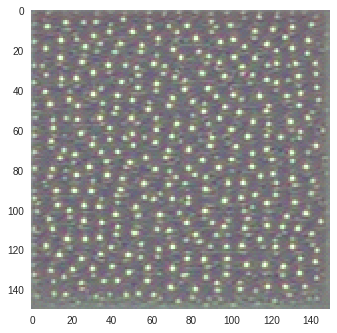

In [41]:
plt.imshow(generate_pattern('block3_conv1', 0))
plt.grid(False)

***Generating a grid of all filter response patterns in a layer***

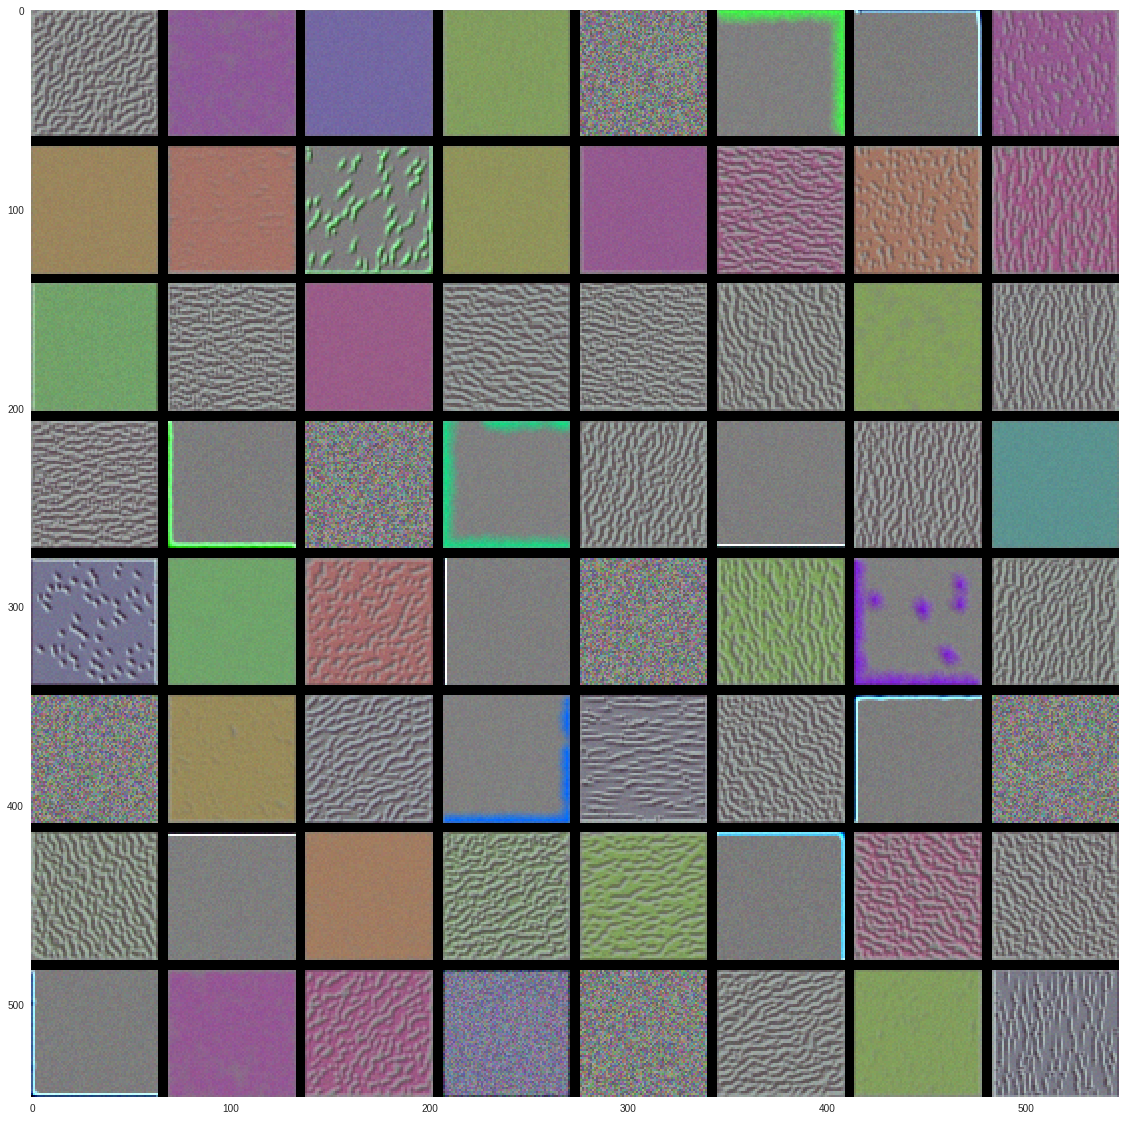

In [58]:
layer_name = 'block1_conv1'
size = 64
margin = 5

results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3)) # Empty (black) image to store results

for i in range(8): # Iterates over the rows of the results grid
    for j in range(8): # Iterates over the columns of the results grid
        filter_img = generate_pattern(layer_name, i + (j * 8), size=size) # Generates the pattern for filter i + (j * 8) in layer_name
        
        horizontal_start = i * size + i * margin # Puts the result in the square (i, j) of the results grid
        horizontal_end = horizontal_start + size
        vertical_start = j * size + j * margin
        vertical_end = vertical_start + size
        results[horizontal_start: horizontal_end, vertical_start: vertical_end, :] = filter_img
        
plt.figure(figsize=(20, 20))
plt.imshow(results.astype('uint8'))
plt.grid(False)

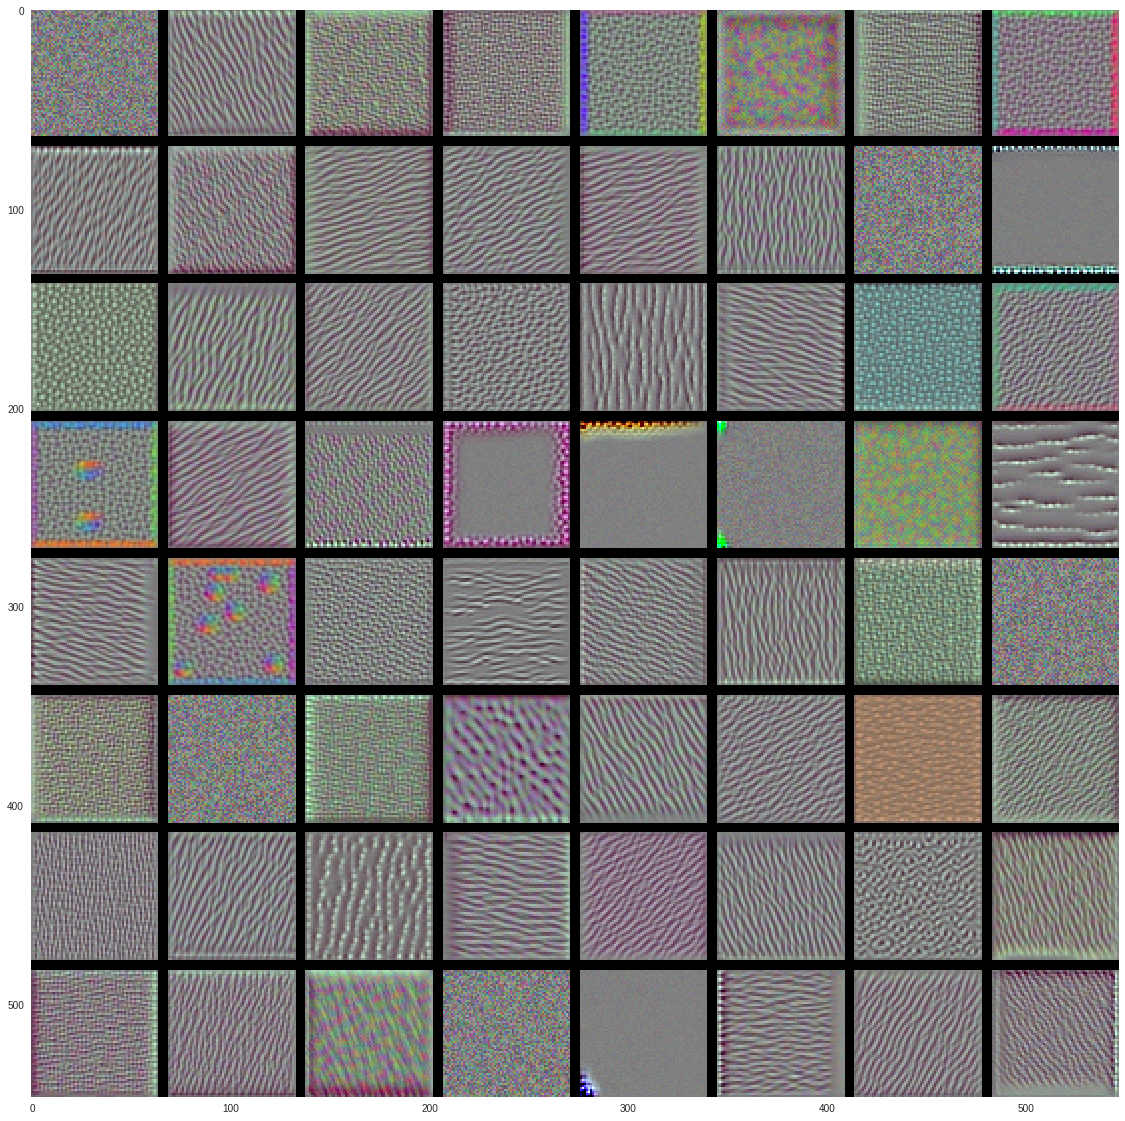

In [60]:
layer_name = 'block2_conv1'
size = 64
margin = 5

results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3)) # Empty (black) image to store results

for i in range(8): # Iterates over the rows of the results grid
    for j in range(8): # Iterates over the columns of the results grid
        filter_img = generate_pattern(layer_name, i + (j * 8), size=size) # Generates the pattern for filter i + (j * 8) in layer_name
        
        horizontal_start = i * size + i * margin # Puts the result in the square (i, j) of the results grid
        horizontal_end = horizontal_start + size
        vertical_start = j * size + j * margin
        vertical_end = vertical_start + size
        results[horizontal_start: horizontal_end, vertical_start: vertical_end, :] = filter_img
        
plt.figure(figsize=(20, 20))
plt.imshow(results.astype('uint8'))
plt.grid(False)

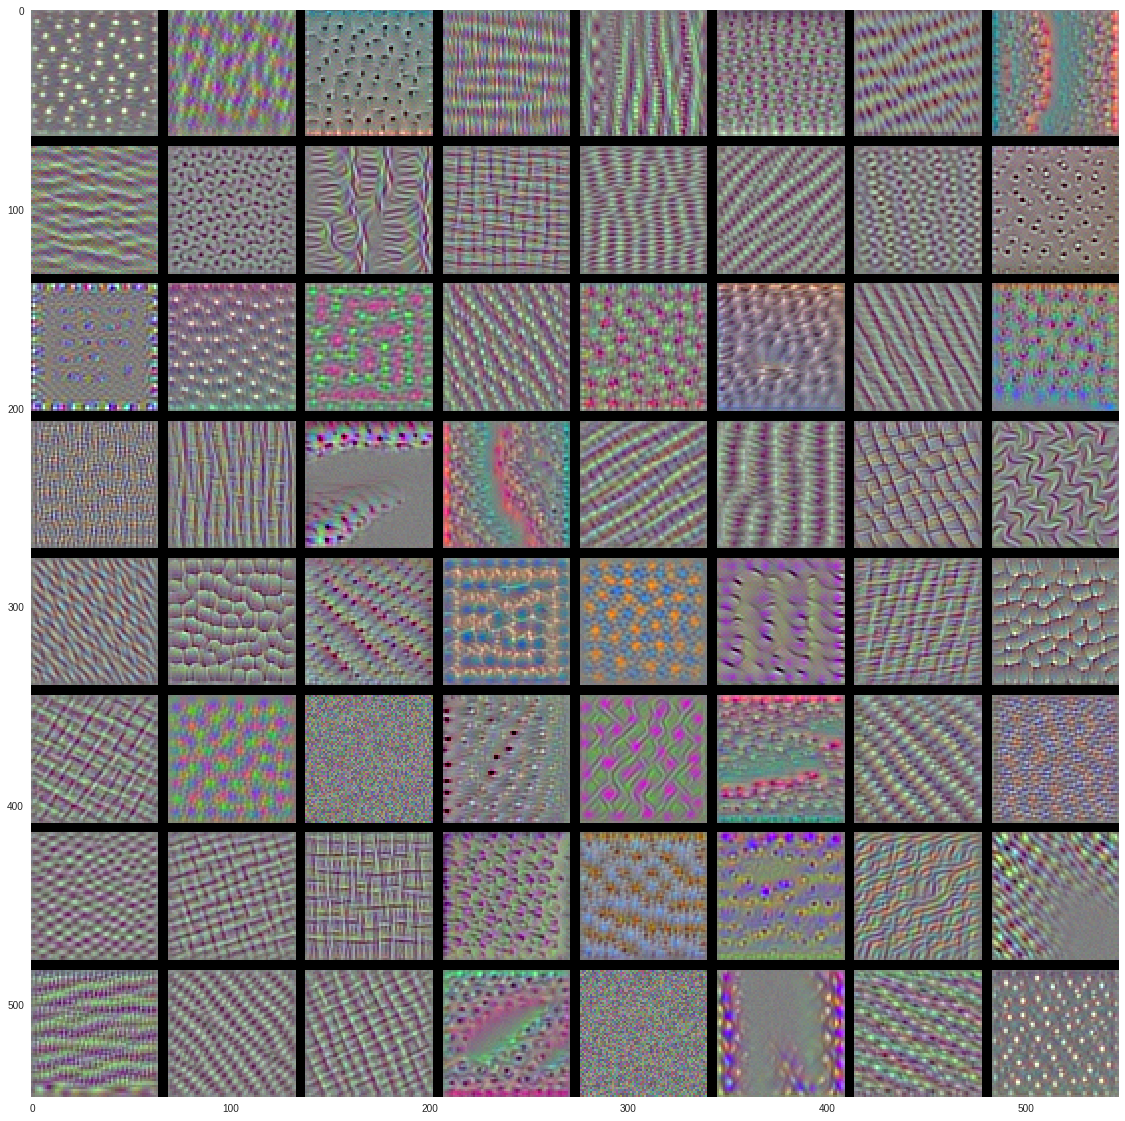

In [61]:
layer_name = 'block3_conv1'
size = 64
margin = 5

results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3)) # Empty (black) image to store results

for i in range(8): # Iterates over the rows of the results grid
    for j in range(8): # Iterates over the columns of the results grid
        filter_img = generate_pattern(layer_name, i + (j * 8), size=size) # Generates the pattern for filter i + (j * 8) in layer_name
        
        horizontal_start = i * size + i * margin # Puts the result in the square (i, j) of the results grid
        horizontal_end = horizontal_start + size
        vertical_start = j * size + j * margin
        vertical_end = vertical_start + size
        results[horizontal_start: horizontal_end, vertical_start: vertical_end, :] = filter_img
        
plt.figure(figsize=(20, 20))
plt.imshow(results.astype('uint8'))
plt.grid(False)

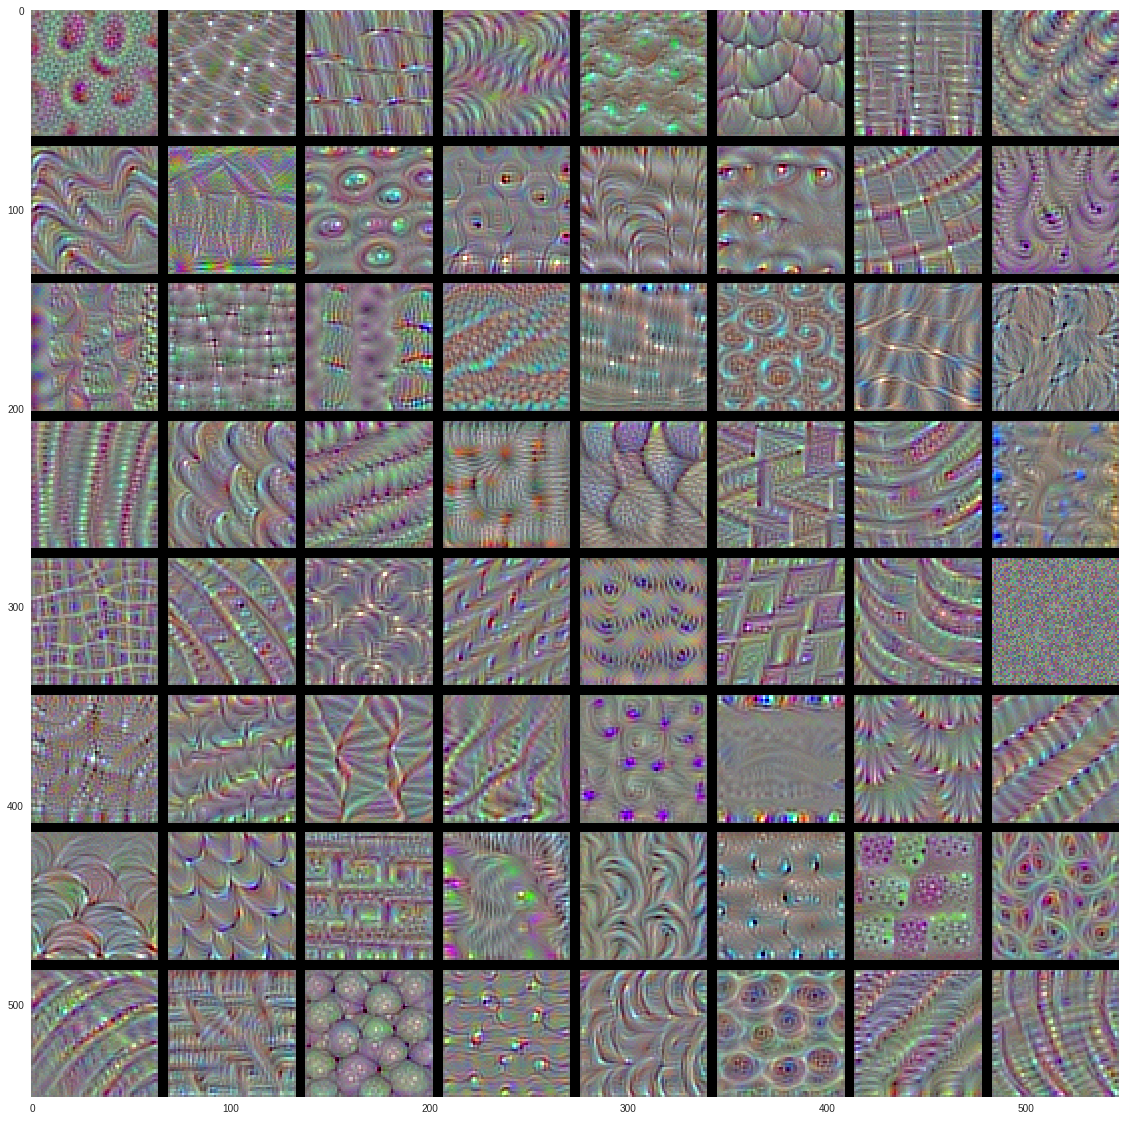

In [62]:
layer_name = 'block4_conv1'
size = 64
margin = 5

results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3)) # Empty (black) image to store results

for i in range(8): # Iterates over the rows of the results grid
    for j in range(8): # Iterates over the columns of the results grid
        filter_img = generate_pattern(layer_name, i + (j * 8), size=size) # Generates the pattern for filter i + (j * 8) in layer_name
        
        horizontal_start = i * size + i * margin # Puts the result in the square (i, j) of the results grid
        horizontal_end = horizontal_start + size
        vertical_start = j * size + j * margin
        vertical_end = vertical_start + size
        results[horizontal_start: horizontal_end, vertical_start: vertical_end, :] = filter_img
        
plt.figure(figsize=(20, 20))
plt.imshow(results.astype('uint8'))
plt.grid(False)